In [6]:
from util import get_unique_player_count

count = get_unique_player_count()
print("Number of unique players:", count)

Number of unique players: 11080


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

login_df = pd.read_csv("data/player_logged_in.csv")

# Convert Time_utc to datetime
login_df['Time_utc'] = pd.to_datetime(login_df['Time_utc'])
# Extract just the date
login_df['date'] = login_df['Time_utc'].dt.date
# Group by date and count unique pids
dau = login_df.groupby('date')['pid'].nunique()

plt.figure(figsize=(12, 5))

# Line Plot
plt.plot(dau.index, dau.values)
plt.title("Daily Active Users (DAU) - Line Graph")
plt.xlabel("Date")
plt.ylabel("Unique Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(12, 5))
plt.bar(dau.index, dau.values)
plt.title("Daily Active Users (DAU) - Bar Graph")
plt.xlabel("Date")
plt.ylabel("Unique Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
login_df = pd.read_csv("data/player_logged_in.csv")
login_df['Time_utc'] = pd.to_datetime(login_df['Time_utc'])
login_df['month'] = login_df['Time_utc'].dt.to_period('M')

# Group by month and count unique pids
mau = login_df.groupby('month')['pid'].nunique()

# Line plot
plt.figure(figsize=(12, 5))
plt.plot(mau.index.astype(str), mau.values)
plt.title("Monthly Active Users (MAU) - Line Graph")
plt.xlabel("Month")
plt.ylabel("Unique Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(12, 5))
plt.bar(mau.index.astype(str), mau.values)
plt.title("Monthly Active Users (MAU) - Bar Graph")
plt.xlabel("Month")
plt.ylabel("Unique Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

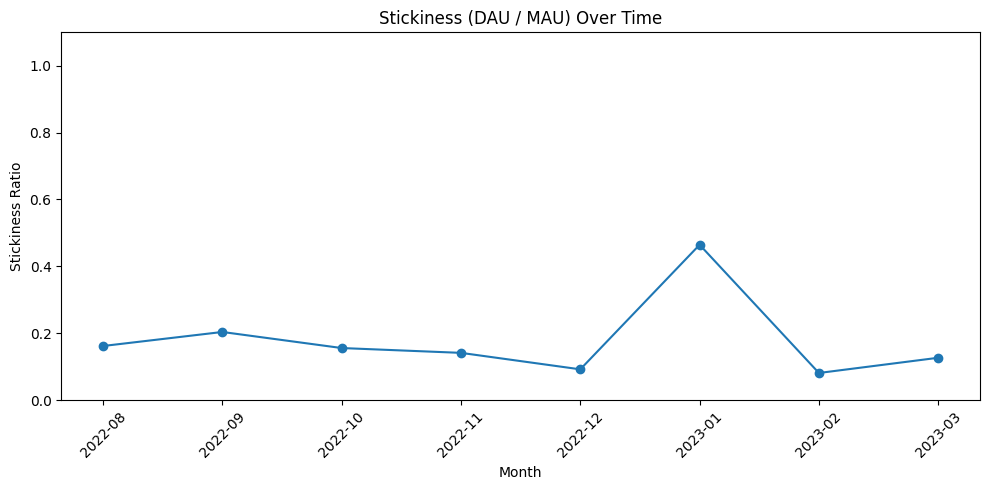

In [ ]:
# Map each date to its month
date_to_month = pd.Series(login_df['month'].values, index=login_df['date']).drop_duplicates()

# Create a DataFrame of DAU with month info
dau_df = pd.DataFrame({'date': dau.index, 'DAU': dau.values})
dau_df['month'] = dau_df['date'].map(date_to_month)

# Group DAU by month and average it
avg_dau_per_month = dau_df.groupby('month')['DAU'].mean()

# Stickiness calculation
stickiness = (avg_dau_per_month / mau).fillna(0)

# Convert index to string for plotting
stickiness.index = stickiness.index.astype(str)

plt.figure(figsize=(10, 5))
plt.plot(stickiness.index, stickiness.values, marker='o')
plt.title("Stickiness (DAU / MAU) Over Time")
plt.xlabel("Month")
plt.ylabel("Stickiness Ratio")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot shows that player engagement slowly decreases over time at a steady rate, but there is a huge spike on 2022-12 to 2023-01, my assumption would be that they released a new dlc or update.

Total sessions: 155100
Median session length (minutes): 60.0


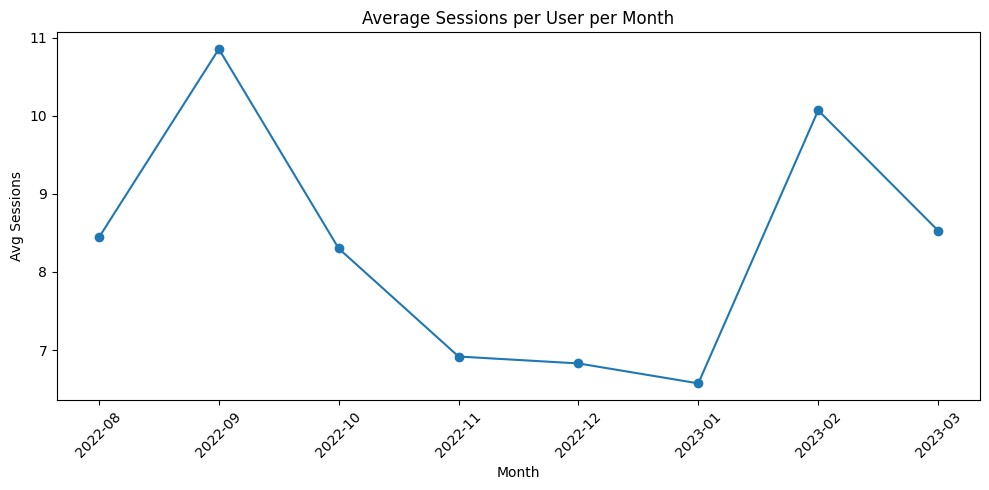

In [ ]:
sessions_df = pd.read_csv("data/job_completed.csv")

total_sessions = len(sessions_df)
print("Total sessions:", total_sessions)

median_session_time = sessions_df['CurrentSessionLength'].median()
print("Median session length (minutes):", median_session_time)

# Convert timestamp to datetime and extract month
sessions_df['Time_utc'] = pd.to_datetime(sessions_df['Time_utc'])
sessions_df['month'] = sessions_df['Time_utc'].dt.to_period('M')

# Count sessions per user per month
sessions_per_user_month = sessions_df.groupby(['month', 'pid']).size()

# Average sessions per user per month
avg_sessions_per_user_month = sessions_per_user_month.groupby('month').mean()

# Plot average sessions per user per month
plt.figure(figsize=(10, 5))
plt.plot(avg_sessions_per_user_month.index.astype(str), avg_sessions_per_user_month.values, marker='o')
plt.title("Average Sessions per User per Month")
plt.xlabel("Month")
plt.ylabel("Avg Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

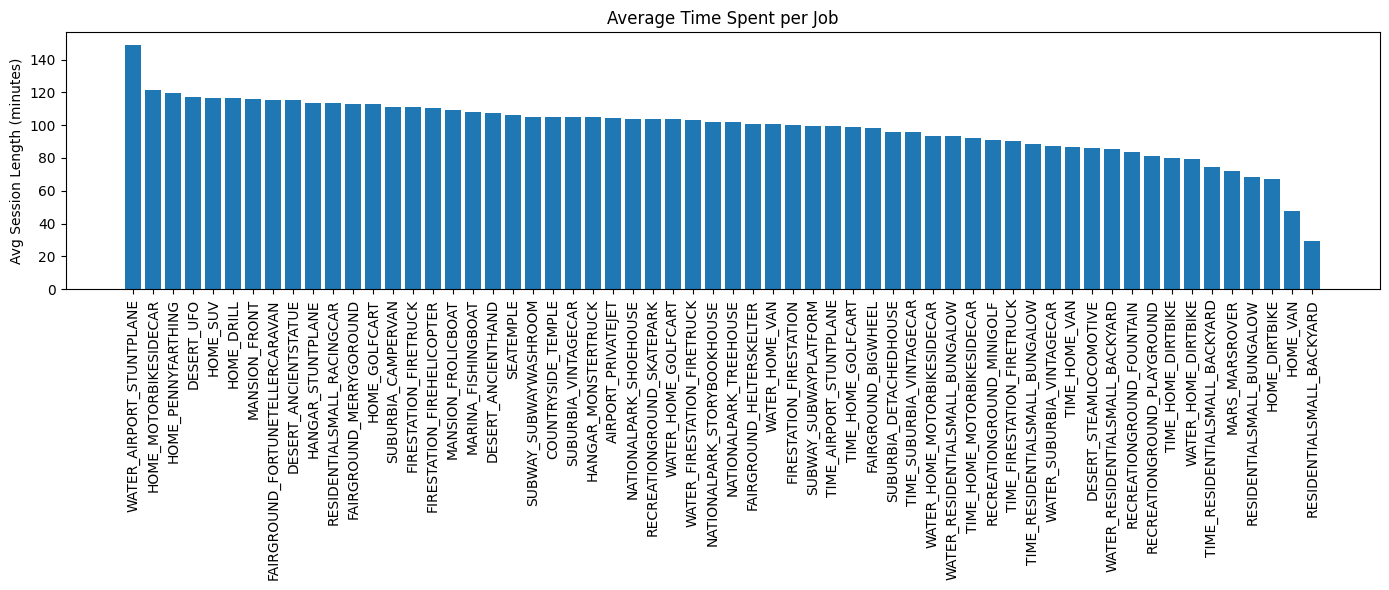

In [27]:
job_exited_df = pd.read_csv("data/job_exited.csv")

# Group by job name and calculate mean & median session length
job_times = job_exited_df.groupby('CurrentJobName')['CurrentSessionLength'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

# Reset index so we can plot
job_times = job_times.reset_index()
job_times.head()

plt.figure(figsize=(14, 6))
plt.bar(job_times['CurrentJobName'], job_times['mean'], label='Mean')
plt.xticks(rotation=90)
plt.ylabel("Avg Session Length (minutes)")
plt.title("Average Time Spent per Job")
plt.tight_layout()
plt.show()

It seems that some jobs are more difficult than others, some taking 2 hours compared to like 30 minutes.

In [ ]:
%pip install seaborn
import seaborn as sns

# Extract hour and weekday
login_df['hour'] = login_df['Time_utc'].dt.hour
login_df['weekday'] = login_df['Time_utc'].dt.day_name()

# Create pivot table: weekday x hour
heatmap_data = login_df.pivot_table(index='weekday', columns='hour', values='pid', aggfunc='count').fillna(0)

# Reorder weekdays for logic
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Logins by Hour and Day (UTC)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'